In [392]:
# Data management and investigation
import pandas as pd
import numpy as np
import missingno as msno
from plotnine import *
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

from functools import reduce

## Import data from each year

### 2019

In [393]:
# import 2019 reliability, net metering, energy efficiency, advanced metering infrastructure, demand response, and service territory data
reliability_19 = pd.read_excel("Data/Reliability_2019.xlsx", 
                               header = 1)
net_metering_19 = pd.read_excel("Data/Net_Metering_2019.xlsx", 
                                header = [0,1,2])
efficiency_19 = pd.read_excel("Data/Energy_Efficiency_2019.xlsx", 
                              header = [0,1,2])
demand_response_19 = pd.read_excel("Data/Demand_Response_2019.xlsx", 
                              header = [0,1,2])
territory_19 = pd.read_excel("Data/Service_Territory_2019.xlsx")
utility_19 = pd.read_excel("Data/Sales_Ult_Cust_2019.xlsx", 
                                header = [0,1,2])
circuits_19 = pd.read_excel("Data/Distribution_Systems_2019.xlsx")
op_19 = pd.read_excel("Data/Operational_Data_2019.xlsx", 
                                header = [0,1,2])

In [394]:
# Combine the headers together to describe each column
net_metering_19.columns = net_metering_19.columns.map(' - '.join)
efficiency_19.columns = efficiency_19.columns.map(' - '.join)
demand_response_19.columns = demand_response_19.columns.map(' - '.join)
utility_19.columns = utility_19.columns.map(' - '.join)
op_19.columns = op_19.columns.map(' - '.join)

In [395]:
# only grab the columns I want from each dataframe
reliability_19 = reliability_19[['Data Year',
                                 'Utility Number',
              'Utility Name', 
              'State', # control
              'Ownership', # control 
              'SAIDI Without MED',
              'SAIFI Without MED', 
              'CAIDI Without MED']].dropna()
reliability_19.columns = ['year','no', 'name', 'state','type','saidi_nomed', 'saifi_nomed', 'caidi_nomed']

In [396]:
op_19 = op_19[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
              'Utility Characteristics - Unnamed: 6_level_1 - NERC Region', 
              'Utility Characteristics - Unnamed: 4_level_1 - State',
              'Energy Sources (Megawatthours) - Unnamed: 9_level_1 - Net Generation',
              'Energy Sources (Megawatthours) - Unnamed: 10_level_1 - Wholesale Power Purchases' 
              ]].dropna()
op_19.columns = ['year','name','nerc','state','gen_mwh','purchase_mwh']

In [397]:
net_metering_19 = net_metering_19[['Utility Characteristics - Unnamed: 0_level_1 - Year',
                                   'Utility Characteristics - Unnamed: 3_level_1 - Utility Name',
                                   'Utility Characteristics - Unnamed: 1_level_1 - State',
                                   'Utility Characteristics - Unnamed: 5_level_1 - BA Code',
                'Photovoltaic - Energy Sold Back MWh - Total',
                'Wind - Energy Sold Back MWh - Total',
                'All Technologies - Energy Sold Back MWh - Total',
                ]].dropna()
net_metering_19.columns = ['year','name', 'state', 'ba','pv_mwh', 'wind_mwh', 'nm_mwh']

In [398]:
efficiency_19 = efficiency_19[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                               'Utility Characteristics - Unnamed: 4_level_1 - State',
                  'Reporting Year Incremental Annual Savings - Energy Savings (MWh) - Total']].dropna()
efficiency_19.columns = ['year','name','state','ee_mwh']

In [399]:
demand_response_19 = demand_response_19[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                                         'Utility Characteristics - Unnamed: 4_level_1 - State',
                    'Yearly Energy and Demand Savings - Number of Customers Enrolled - Total',
                    'Yearly Energy and Demand Savings - Energy Savings (MWh) - Total']].dropna()
demand_response_19.columns = ['year','name', 'state','dem_res_customers', 'dem_res_mwh']

In [400]:
territory_19 = territory_19[['Data Year',
                             'Utility Name',
             'State',
             'County']]
territory_19.columns = ['year','name', 'state', 'county']

In [401]:
utility_19 = utility_19[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                         'Utility Characteristics - Unnamed: 6_level_1 - State',
                         'TOTAL - Sales - Megawatthours',
                         'TOTAL - Customers - Count']].dropna()
utility_19.columns = ['year','name', 'state','total_mwh','total_cust']

In [402]:
circuits_19 = circuits_19[['Data Year',
                           'Utility Name',
                           'State',
                           'Distribution Circuits',
                         'Circuits with Voltage Optimization']]
circuits_19.columns = ['year','name', 'state','circuits', 'voltage']

## 2018

In [403]:
# import 2018 reliability, net metering, energy efficiency, advanced metering infrastructure, demand response, and service territory data
reliability_18 = pd.read_excel("Data/Reliability_2018.xlsx", 
                               header = 1)
net_metering_18 = pd.read_excel("Data/Net_Metering_2018.xlsx", 
                                header = [0,1,2])
efficiency_18 = pd.read_excel("Data/Energy_Efficiency_2018.xlsx", 
                              header = [0,1,2])
demand_response_18 = pd.read_excel("Data/Demand_Response_2018.xlsx", 
                              header = [0,1,2])
territory_18 = pd.read_excel("Data/Service_Territory_2018.xlsx")
utility_18 = pd.read_excel("Data/Sales_Ult_Cust_2018.xlsx", 
                                header = [0,1,2])
circuits_18 = pd.read_excel("Data/Distribution_Systems_2018.xlsx")
op_18 = pd.read_excel("Data/Operational_Data_2018.xlsx", 
                                header = [0,1,2])

In [404]:
# Combine the headers together to describe each column
net_metering_18.columns = net_metering_18.columns.map(' - '.join)
efficiency_18.columns = efficiency_18.columns.map(' - '.join)
demand_response_18.columns = demand_response_18.columns.map(' - '.join)
utility_18.columns = utility_18.columns.map(' - '.join)
op_18.columns = op_18.columns.map(' - '.join)

In [405]:
# only grab the columns I want from each dataframe
reliability_18 = reliability_18[['Data Year',
                                 'Utility Number',
              'Utility Name', 
              'State', # control
              'Ownership', # control 
              'SAIDI Without MED',
              'SAIFI Without MED', 
              'CAIDI Without MED']].dropna()
reliability_18.columns = ['year','no', 'name', 'state','type','saidi_nomed', 'saifi_nomed', 'caidi_nomed']

In [406]:
op_18 = op_18[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
              'Utility Characteristics - Unnamed: 5_level_1 - NERC Region', 
              'Utility Characteristics - Unnamed: 3_level_1 - State',
              'Energy Sources (Megawatthours) - Unnamed: 8_level_1 - Net Generation',
              'Energy Sources (Megawatthours) - Unnamed: 9_level_1 - Wholesale Power Purchases' 
              ]].dropna()
op_18.columns = ['year','name','nerc','state','gen_mwh','purchase_mwh']

In [407]:
net_metering_18 = net_metering_18[['Utility Characteristics - Unnamed: 0_level_1 - Year',
                                   'Utility Characteristics - Unnamed: 3_level_1 - Utility Name',
                                   'Utility Characteristics - Unnamed: 1_level_1 - State',
                                   'Utility Characteristics - Unnamed: 4_level_1 - BA Code',
                'Photovoltaic - Energy Sold Back MWh - Total',
                'Wind - Energy Sold Back MWh - Total',
                'All Technologies - Energy Sold Back MWh - Total',
                ]].dropna()
net_metering_18.columns = ['year','name', 'state', 'ba','pv_mwh', 'wind_mwh', 'nm_mwh']

In [408]:
efficiency_18 = efficiency_18[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                               'Utility Characteristics - Unnamed: 3_level_1 - State',
                  'Reporting Year Incremental Annual Savings - Energy Savings (MWh) - Total']].dropna()
efficiency_18.columns = ['year','name','state','ee_mwh']

In [409]:
demand_response_18 = demand_response_18[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                                         'Utility Characteristics - Unnamed: 3_level_1 - State',
                    'Yearly Energy and Demand Savings - Number of Customers Enrolled - Total',
                    'Yearly Energy and Demand Savings - Energy Savings (MWh) - Total']].dropna()
demand_response_18.columns = ['year','name', 'state','dem_res_customers', 'dem_res_mwh']

In [410]:
territory_18 = territory_18[['Data Year',
                             'Utility Name',
             'State',
             'County']]
territory_18.columns = ['year','name', 'state', 'county']

In [411]:
utility_18 = utility_18[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                         'Utility Characteristics - Unnamed: 6_level_1 - State',
                         'TOTAL - Sales - Megawatthours',
                         'TOTAL - Customers - Count']].dropna()
utility_18.columns = ['year','name', 'state','total_mwh','total_cust']

In [412]:
circuits_18 = circuits_18[['Data Year',
                           'Utility Name',
                           'State',
                           'Distribution Circuits',
                         'Circuits with Voltage Optimization']]
circuits_18.columns = ['year','name', 'state','circuits', 'voltage']

## 2017

In [413]:
# import 2017 reliability, net metering, energy efficiency, advanced metering infrastructure, demand response, and service territory data
reliability_17 = pd.read_excel("Data/Reliability_2017.xlsx", 
                               header = 1)
net_metering_17 = pd.read_excel("Data/Net_Metering_2017.xlsx", 
                                header = [0,1,2])
efficiency_17 = pd.read_excel("Data/Energy_Efficiency_2017.xlsx", 
                              header = [0,1,2])
demand_response_17 = pd.read_excel("Data/Demand_Response_2017.xlsx", 
                              header = [0,1,2])
territory_17 = pd.read_excel("Data/Service_Territory_2017.xlsx")
utility_17 = pd.read_excel("Data/Sales_Ult_Cust_2017.xlsx", 
                                header = [0,1,2])
circuits_17 = pd.read_excel("Data/Distribution_Systems_2017.xlsx")
op_17 = pd.read_excel("Data/Operational_Data_2017.xlsx", 
                                header = [0,1,2])

In [414]:
# Combine the headers together to describe each column
net_metering_17.columns = net_metering_17.columns.map(' - '.join)
efficiency_17.columns = efficiency_17.columns.map(' - '.join)
demand_response_17.columns = demand_response_17.columns.map(' - '.join)
utility_17.columns = utility_17.columns.map(' - '.join)
op_17.columns = op_17.columns.map(' - '.join)

In [415]:
# only grab the columns I want from each dataframe
reliability_17 = reliability_17[['Data Year',
                                 'Utility Number',
              'Utility Name', 
              'State', # control
              'Ownership', # control 
              'SAIDI Without MED',
              'SAIFI Without MED', 
              'CAIDI Without MED']].dropna()
reliability_17.columns = ['year','no', 'name', 'state','type','saidi_nomed', 'saifi_nomed', 'caidi_nomed']

In [416]:
op_17 = op_17[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
              'Utility Characteristics - Unnamed: 5_level_1 - NERC Region', 
              'Utility Characteristics - Unnamed: 3_level_1 - State',
              'Energy Sources (Megawatthours) - Unnamed: 8_level_1 - Net Generation',
              'Energy Sources (Megawatthours) - Unnamed: 9_level_1 - Wholesale Power Purchases' 
              ]].dropna()
op_17.columns = ['year','name','nerc','state','gen_mwh','purchase_mwh']

In [417]:
net_metering_17 = net_metering_17[['Utility Characteristics - Unnamed: 0_level_1 - Year',
                                   'Utility Characteristics - Unnamed: 3_level_1 - Utility Name',
                                   'Utility Characteristics - Unnamed: 1_level_1 - State',
                                   'Utility Characteristics - Unnamed: 4_level_1 - BA Code',
                'Photovoltaic - Energy Sold Back MWh - Total',
                'Wind - Energy Sold Back MWh - Total',
                'All Technologies - Energy Sold Back MWh - Total',
                ]].dropna()
net_metering_17.columns = ['year','name', 'state', 'ba','pv_mwh', 'wind_mwh', 'nm_mwh']

In [418]:
efficiency_17 = efficiency_17[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                               'Utility Characteristics - Unnamed: 3_level_1 - State',
                  'Reporting Year Incremental Annual Savings - Energy Savings (MWh) - Total']].dropna()
efficiency_17.columns = ['year','name','state','ee_mwh']

In [419]:
demand_response_17 = demand_response_17[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                                         'Utility Characteristics - Unnamed: 3_level_1 - State',
                    'Yearly Energy and Demand Savings - Number of Customers Enrolled - Total',
                    'Yearly Energy and Demand Savings - Energy Savings (MWh) - Total']].dropna()
demand_response_17.columns = ['year','name', 'state','dem_res_customers', 'dem_res_mwh']

In [420]:
territory_17 = territory_17[['Data Year',
                             'Utility Name',
             'State',
             'County']]
territory_17.columns = ['year','name', 'state', 'county']

In [421]:
utility_17 = utility_17[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                         'Utility Characteristics - Unnamed: 6_level_1 - State',
                         'TOTAL - Sales - Megawatthours',
                         'TOTAL - Customers - Count']].dropna()
utility_17.columns = ['year','name', 'state','total_mwh','total_cust']

In [422]:
circuits_17 = circuits_17[['Data Year',
                           'Utility Name',
                           'State',
                           'Distribution Circuits',
                         'Circuits with Voltage Optimization']]
circuits_17.columns = ['year','name', 'state','circuits', 'voltage']

## 2016

In [423]:
# import 2016 reliability, net metering, energy efficiency, advanced metering infrastructure, demand response, and service territory data
reliability_16 = pd.read_excel("Data/Reliability_2016.xlsx", 
                               header = 1)
net_metering_16 = pd.read_excel("Data/Net_Metering_2016.xlsx", 
                                header = [0,1,2,3])
efficiency_16 = pd.read_excel("Data/Energy_Efficiency_2016.xlsx", 
                              header = [0,1,2])
demand_response_16 = pd.read_excel("Data/Demand_Response_2016.xlsx", 
                              header = [0,1,2])
territory_16 = pd.read_excel("Data/Service_Territory_2016.xlsx")
utility_16 = pd.read_excel("Data/Sales_Ult_Cust_2016.xlsx", 
                                header = [0,1,2])
circuits_16 = pd.read_excel("Data/Distribution_Systems_2016.xlsx")
op_16 = pd.read_excel("Data/Operational_Data_2016.xlsx", 
                                header = [0,1,2])

In [424]:
# Combine the headers together to describe each column
net_metering_16.columns = net_metering_16.columns.map(' - '.join)
efficiency_16.columns = efficiency_16.columns.map(' - '.join)
demand_response_16.columns = demand_response_16.columns.map(' - '.join)
utility_16.columns = utility_16.columns.map(' - '.join)
op_16.columns = op_16.columns.map(' - '.join)

In [425]:
# only grab the columns I want from each dataframe
reliability_16 = reliability_16[['Data Year',
                                 'Utility Number',
              'Utility Name', 
              'State', # control
              'Ownership', # control 
              'SAIDI Without MED',
              'SAIFI Without MED', 
              'CAIDI Without MED']].dropna()
reliability_16.columns = ['year','no', 'name', 'state','type','saidi_nomed', 'saifi_nomed', 'caidi_nomed']

In [426]:
op_16 = op_16[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
              'Utility Characteristics - Unnamed: 5_level_1 - NERC Region', 
              'Utility Characteristics - Unnamed: 3_level_1 - State',
              'Energy Sources (Megawatthours) - Unnamed: 8_level_1 - Net Generation',
              'Energy Sources (Megawatthours) - Unnamed: 9_level_1 - Wholesale Power Purchases' 
              ]].dropna()
op_16.columns = ['year','name','nerc','state','gen_mwh','purchase_mwh']

In [427]:
net_metering_16 = net_metering_16[['Utility Level Data - States - Utility Characteristics - Unnamed: 0_level_2 - Year',
                                   'Utility Level Data - States - Utility Characteristics - Unnamed: 3_level_2 - Utility Name',
                                   'Utility Level Data - States - Utility Characteristics - Unnamed: 1_level_2 - State',
               'Utility Level Data - States - Photovoltaic - Energy Sold Back MWh - Total',
                'Utility Level Data - States - Wind - Energy Sold Back MWh - Total',
                'Utility Level Data - States - All Technologies - Energy Sold Back MWh - Total',
                ]].dropna()
net_metering_16.columns = ['year','name', 'state','pv_mwh', 'wind_mwh', 'nm_mwh']

In [428]:
efficiency_16 = efficiency_16[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                               'Utility Characteristics - Unnamed: 3_level_1 - State',
                  'Reporting Year Incremental Annual Savings - Energy Savings (MWh) - Total']].dropna()
efficiency_16.columns = ['year','name','state','ee_mwh']

In [429]:
demand_response_16 = demand_response_16[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                                         'Utility Characteristics - Unnamed: 3_level_1 - State',
                    'Yearly Energy and Demand Savings - Number of Customers Enrolled - Total',
                    'Yearly Energy and Demand Savings - Energy Savings (MWh) - Total']].dropna()
demand_response_16.columns = ['year','name', 'state','dem_res_customers', 'dem_res_mwh']

In [430]:
territory_16 = territory_16[['Data Year',
                             'Utility Name',
             'State',
             'County']]
territory_16.columns = ['year','name', 'state', 'county']

In [431]:
utility_16 = utility_16[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                         'Utility Characteristics - Unnamed: 6_level_1 - State',
                         'TOTAL - Sales - Megawatthours',
                         'TOTAL - Customers - Count']].dropna()
utility_16.columns = ['year','name', 'state','total_mwh','total_cust']

In [432]:
circuits_16 = circuits_16[['Data Year',
                           'Utility Name',
                           'State',
                           'Distribution Circuits',
                         'Circuits with Voltage Optimization']]
circuits_16.columns = ['year','name', 'state','circuits', 'voltage']

## 2015

In [433]:
# import 2015 reliability, net metering, energy efficiency, advanced metering infrastructure, demand response, and service territory data
reliability_15 = pd.read_excel("Data/Reliability_2015.xlsx", 
                               header = 1)
net_metering_15 = pd.read_excel("Data/Net_Metering_2015.xlsx", 
                                header = [0,1,2])
efficiency_15 = pd.read_excel("Data/Energy_Efficiency_2015.xlsx", 
                              header = [0,1,2])
demand_response_15 = pd.read_excel("Data/Demand_Response_2015.xlsx", 
                              header = [0,1,2])
territory_15 = pd.read_excel("Data/Service_Territory_2015.xlsx")
utility_15 = pd.read_excel("Data/Sales_Ult_Cust_2015.xlsx", 
                                header = [0,1,2])
circuits_15 = pd.read_excel("Data/Distribution_Systems_2015.xlsx")
op_15 = pd.read_excel("Data/Operational_Data_2015.xlsx", 
                                header = [0,1,2])

In [434]:
# Combine the headers together to describe each column
net_metering_15.columns = net_metering_15.columns.map(' - '.join)
efficiency_15.columns = efficiency_15.columns.map(' - '.join)
demand_response_15.columns = demand_response_15.columns.map(' - '.join)
utility_15.columns = utility_15.columns.map(' - '.join)
op_15.columns = op_15.columns.map(' - '.join)

In [435]:
# only grab the columns I want from each dataframe
reliability_15 = reliability_15[['Data Year',
                                 'Utility Number',
              'Utility Name', 
              'State', # control
              'Ownership', # control 
              'SAIDI Without MED',
              'SAIFI Without MED', 
              'CAIDI Without MED']].dropna()
reliability_15.columns = ['year','no', 'name', 'state','type','saidi_nomed', 'saifi_nomed', 'caidi_nomed']

In [436]:
op_15 = op_15[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
              'Utility Characteristics - Unnamed: 5_level_1 - NERC Region', 
              'Utility Characteristics - Unnamed: 3_level_1 - State',
              'Energy Sources (Megawatthours) - Unnamed: 8_level_1 - Net Generation',
              'Energy Sources (Megawatthours) - Unnamed: 9_level_1 - Wholesale Power Purchases' 
              ]].dropna()
op_15.columns = ['year','name','nerc','state','gen_mwh','purchase_mwh']

In [437]:
net_metering_15 = net_metering_15[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                                   'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                                   'Utility Characteristics - Unnamed: 3_level_1 - State',
                                   'Photovoltaic - Energy Sold Back MWh - Total',
                'Wind - Energy Sold Back MWh - Total',
                'Total - Energy Sold Back MWh - Total',
                ]].dropna()
net_metering_15.columns = ['year','name', 'state','pv_mwh', 'wind_mwh', 'nm_mwh']

In [438]:
efficiency_15 = efficiency_15[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                               'Utility Characteristics - Unnamed: 3_level_1 - State',
                  'Reporting Year Incremental Annual Savings - Energy Savings (MWh) - Total']].dropna()
efficiency_15.columns = ['year','name','state','ee_mwh']

In [439]:
demand_response_15 = demand_response_15[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                                         'Utility Characteristics - Unnamed: 3_level_1 - State',
                    'Yearly Energy and Demand Savings - Number of Customers Enrolled - Total',
                    'Yearly Energy and Demand Savings - Energy Savings (MWh) - Total']].dropna()
demand_response_15.columns = ['year','name', 'state','dem_res_customers', 'dem_res_mwh']

In [440]:
territory_15 = territory_15[['Data Year',
                             'Utility Name',
             'State',
             'County']]
territory_15.columns = ['year','name', 'state', 'county']

In [441]:
utility_15 = utility_15[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                         'Utility Characteristics - Unnamed: 6_level_1 - State',
                         'TOTAL - Sales - Megawatthours',
                         'TOTAL - Customers - Count']].dropna()
utility_15.columns = ['year','name', 'state','total_mwh','total_cust']

In [442]:
circuits_15 = circuits_15[['Data Year',
                           'Utility Name',
                           'State',
                           'Distribution Circuits',
                         'Circuits with Voltage Optimization']]
circuits_15.columns = ['year','name', 'state','circuits', 'voltage']

# Merge all datasets

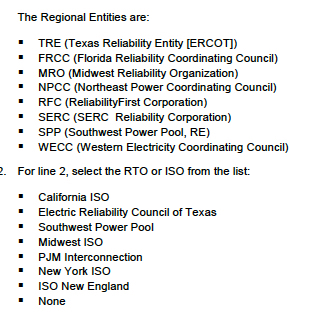

In [443]:
# all of our datasets into onee list
df_list = [circuits_15, circuits_16, circuits_17, circuits_18, circuits_19, demand_response_15, demand_response_16, demand_response_17, demand_response_18, 
demand_response_19, df, efficiency_15, efficiency_16, efficiency_17, efficiency_18, efficiency_19, filename, net_metering, 
net_metering_15, net_metering_16, net_metering_17, net_metering_18, net_metering_19, op_15, op_16, op_17, op_18, 
op_19, reliability_15, reliability_16, reliability_17, reliability_18, reliability_19, territory_15, territory_16, territory_17, 
territory_18, territory_19, utility_15, utility_16, utility_17, utility_18, utility_19]

In [523]:
# merge all the lists together by utility name 
df_list_19 = [utility_19, reliability_19, circuits_19, op_19, net_metering_19, efficiency_19, demand_response_19]
df_19 = reduce(lambda left,right: pd.merge(left,right,on=['name','state','year'], how='outer'), df_list_19)

In [524]:
df_list_18 = [utility_18, reliability_18, circuits_18, op_18, net_metering_18, efficiency_18, demand_response_18]
df_18 = reduce(lambda left,right: pd.merge(left,right,on=['name','state','year'], how='outer'), df_list_18)

In [525]:
df_list_17 = [utility_17, reliability_17, circuits_17, op_17, net_metering_17, efficiency_17, demand_response_17]
df_17 = reduce(lambda left,right: pd.merge(left,right,on=['name','state','year'], how='outer'), df_list_17)

In [526]:
df_list_16 = [utility_16, reliability_16, circuits_16, op_16, net_metering_16, efficiency_16, demand_response_16]
df_16 = reduce(lambda left,right: pd.merge(left,right,on=['name','state','year'], how='outer'), df_list_16)

In [527]:
df_list_15 = [utility_15, reliability_15, circuits_15, op_15, net_metering_15, efficiency_15, demand_response_15]
df_15 = reduce(lambda left,right: pd.merge(left,right,on=['name','state','year'], how='outer'), df_list_15)

In [528]:
df = df_19.append([df_18,df_17,df_16,df_15])

In [529]:
# drop the duplicate rows 
df = df[~df.duplicated(['name', 'state','year'])]

In [530]:
# drop all the entries where my outcome variable is not present (SAIDI, SAIFI and CAIDI are same – I checked)
df = df[~df.saidi_nomed.isna()]

In [531]:
# remove those missing total customer data and total megawatthours or nerc region
df = df[~df.total_mwh.isna()]
df = df[~df.total_cust.isna()]
df = df[~df.nerc.isna()]

In [532]:
df.isna().sum()

year                    0
name                    0
state                   0
total_mwh               0
total_cust              0
no                      0
type                    0
saidi_nomed             0
saifi_nomed             0
caidi_nomed             0
circuits                0
voltage                 0
nerc                    0
gen_mwh                 0
purchase_mwh            0
ba                   2679
pv_mwh               1323
wind_mwh             1323
nm_mwh               1323
ee_mwh               3087
dem_res_customers    3560
dem_res_mwh          3560
dtype: int64

In [533]:
# fill na's with 0 
# i assume that if they didn't fill it out, there is nothing to report
# i filled ba code even though that's incorrect because i ended up not using it
df = df.fillna(0).reset_index(drop=True)

### Final check for accuracy

In [534]:
df.sample(6)

,year,name,state,total_mwh,total_cust,no,type,saidi_nomed,saifi_nomed,caidi_nomed,...,nerc,gen_mwh,purchase_mwh,ba,pv_mwh,wind_mwh,nm_mwh,ee_mwh,dem_res_customers,dem_res_mwh
1798,2018.0,Sam Houston Electric Coop Inc,TX,1439902.0,75236.0,16613.0,Cooperative,313,.,.,...,SERC,.,1499187,0,0.000,0.0,0.000,0,0,0
3652,2016.0,City of Paducah - (KY),KY,546664.0,22543.0,14371.0,Municipal,52.68,1.43,36.8392,...,RFC,12776,562184,0,0.000,0.0,0.000,0,0,0
334,2019.0,PUD No 1 of Grays Harbor County,WA,951186.0,43296.0,7548.0,Political Subdivision,117,0.7,167.143,...,WECC,0,1.98386e+06,BPAT,0.000,0.0,0.000,6615.25,0,0
4274,2015.0,City of Geneva- (IL),IL,393266.0,9692.0,7096.0,Municipal,19.309,0.4,48.2725,...,RFC,4529,410495,0,0.000,0.0,0.000,0,0,0
983,2019.0,Webster Electric Coop,MO,377399.0,18507.0,20318.0,Cooperative,.,.,.,...,SERC,0,392590,AECI,43.394,0.0,43.394,0,0,0
202,2019.0,Craig-Botetourt Electric Coop,VA,82760.0,6746.0,4471.0,Cooperative,610.42,3.16,193.171,...,RFC,0,92775,PJM,0.000,0.0,0.000,0,0,0


Here, I did a check on a random sample of 6 observations across categories to make sure everything looked good. When there's a NA for any of the reliability metrics, that means that data was missing from the survey, and I cannot simply impute with 0's – that would incorrectly be assuming that they had no system interruptions. My best option is to simply drop these rows, since they lack my outcome variable.

### Make the percentage net metering, energy efficiency, and demand response columns. 

In [535]:
df['pv_pct'] = ((df['pv_mwh']/df['total_mwh']) * 100).fillna(0)

In [536]:
df['wind_pct'] = ((df['wind_mwh']/df['total_mwh']) * 100).fillna(0)

In [537]:
df['nm_pct'] = ((df['nm_mwh']/df['total_mwh']) * 100).fillna(0)

In [573]:
# change periods to 0 
df.loc[df["ee_mwh"] == ".", 'ee_mwh'] = 0

In [578]:
df.loc[df["dem_res_customers"] == ".", 'dem_res_customers'] = 0

In [581]:
df.loc[df["dem_res_mwh"] == ".", 'dem_res_mwh'] = 0

In [584]:
df.loc[df["purchase_mwh"] == ".", 'purchase_mwh'] = 0

In [ ]:
df.loc[df["dem_res_customers"] == ".", 'dem_res_customers'] = 0

In [597]:
df = df[(df.voltage != '.')]

In [599]:
df = df[(df.circuits != '.')]

In [615]:
df.query("voltage == ''")

,year,name,state,total_mwh,total_cust,no,type,saidi_nomed,saifi_nomed,caidi_nomed,...,ba,pv_mwh,wind_mwh,nm_mwh,ee_mwh,dem_res_customers,dem_res_mwh,pv_pct,wind_pct,nm_pct


In [629]:
df['dem_res_customers'] = pd.to_numeric(df['dem_res_customers'], errors='coerce')

In [632]:
df['dem_res_mwh'] = pd.to_numeric(df['dem_res_mwh'], errors='coerce')

In [634]:
df['purchase_mwh'] = pd.to_numeric(df['purchase_mwh'], errors='coerce')

In [662]:
df['gen_mwh'] = pd.to_numeric(df['gen_mwh'], errors='coerce')

In [635]:
df['voltage'] = pd.to_numeric(df['voltage'], errors='coerce')

In [636]:
df['circuits'] = pd.to_numeric(df['circuits'], errors='coerce')

In [639]:
# coercion produced new missing values in the 2 demand response columns so i fill them in
df = df.fillna(0).reset_index(drop=True)

In [640]:
df['ee_pct'] = ((df['ee_mwh']/df['total_mwh']) * 100).fillna(0)

In [641]:
df['dem_res_pct'] = ((df['dem_res_mwh']/df['total_mwh']) * 100).fillna(0)

In [642]:
df['dem_res_cust_pct'] = ((df['dem_res_customers']/df['total_cust']) * 100).fillna(0)

### Need to justify using SAIDI rather than SAIFI or CAIDI

Using 2015-2019 data: There are still more entries for SAIDI than either of the other 2 metrics.

When I was just using 2019 data: There are 766 entries for SAIDI, and only about 705 for SAIFI and CAIDI. Therefore, I will be using SAIDI as my index for grid reliability.

In [127]:
# check non zero entries
# df_18[(df_18.saifi_nomed != '.')]

In [650]:
# limit dataframe to SAIDI, which has the most nonzero entries 
df = df[(df.saidi_nomed != '.')].reset_index(drop=True)

In [651]:
df.describe()

,year,total_mwh,total_cust,no,circuits,voltage,purchase_mwh,pv_mwh,wind_mwh,nm_mwh,ee_mwh,dem_res_customers,dem_res_mwh,pv_pct,wind_pct,nm_pct,ee_pct,dem_res_pct,dem_res_cust_pct
count,2699.000000,2.699000e+03,2.699000e+03,2699.000000,2699.000000,2699.000000,2.699000e+03,2699.000000,2699.000000,2699.000000,2.699000e+03,2.699000e+03,2699.000000,2699.000000,2699.000000,2699.000000,2699.000000,2699.000000,2699.000000
mean,2017.140422,3.149517e+06,1.482996e+05,11953.952205,202.028159,51.051501,1.930104e+06,872.834801,19.732615,904.241550,2.986024e+04,1.192375e+04,1129.133774,0.033374,0.002732,0.037360,0.353077,0.020304,4.378855
std,1.462375,9.435886e+06,4.606789e+05,7908.112320,510.849556,224.569432,4.816731e+06,7740.335961,334.013823,7786.815114,1.406401e+05,7.649018e+04,24925.414395,0.169005,0.017980,0.174422,1.039859,0.190279,13.255037
min,2015.000000,3.294000e+03,3.420000e+02,97.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,2.856545e+05,1.155600e+04,5585.000000,33.000000,0.000000,2.736575e+05,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.000000,5.650260e+05,2.608500e+04,11740.000000,60.000000,0.000000,5.706570e+05,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,1.341410e+06,6.374250e+04,16679.000000,122.000000,22.000000,1.342214e+06,50.910500,0.000000,58.038000,1.299500e+03,4.000000e+01,0.000000,0.007315,0.000000,0.008188,0.237519,0.000000,0.050169
max,2019.000000,1.119557e+08,5.069189e+06,57483.000000,5619.000000,2787.000000,7.229354e+07,174137.899000,11648.213000,174137.899000,2.865573e+06,1.323922e+06,977215.000000,2.737364,0.334026,2.737446,13.437062,3.509534,100.000000


In [130]:
#df_18 = df_18.drop(['pv_mwh',
#            'wind_mwh',
#            'nm_mwh',
#            'ee_mwh',
#            'dem_res_customers',
#            'dem_res_mwh'], axis = 1)

In [653]:
df.sort_values(by='name')

,year,name,state,total_mwh,total_cust,no,type,saidi_nomed,saifi_nomed,caidi_nomed,...,nm_mwh,ee_mwh,dem_res_customers,dem_res_mwh,pv_pct,wind_pct,nm_pct,ee_pct,dem_res_pct,dem_res_cust_pct
843,2018.0,4-County Electric Power Assn,MS,1114759.0,48564.0,6641.0,Cooperative,153.8,2.06,74.6602,...,0.000,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000,0.0,0.00000
1850,2016.0,4-County Electric Power Assn,MS,1035546.0,47648.0,6641.0,Cooperative,165.23,2.1,78.681,...,0.000,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000,0.0,0.00000
200,2019.0,4-County Electric Power Assn,MS,1090317.0,48915.0,6641.0,Cooperative,125.82,1.47,85.5918,...,0.000,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000,0.0,0.00000
2331,2015.0,4-County Electric Power Assn,MS,1017037.0,47122.0,6641.0,Cooperative,151.28,1.77,85.4689,...,0.000,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000,0.0,0.00000
1360,2017.0,4-County Electric Power Assn,MS,1022634.0,48243.0,6641.0,Cooperative,131.86,1.87,70.5134,...,0.000,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,2015.0,Y-W Electric Assn Inc,CO,326934.0,8881.0,21075.0,Cooperative,70.2,.,.,...,0.000,648.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.198205,0.0,0.00000
2146,2016.0,Y-W Electric Assn Inc,CO,332183.0,8817.0,21075.0,Cooperative,101.9,.,.,...,0.003,297.0,0.0,0.0,9.031167e-07,0.0,9.031167e-07,0.089409,0.0,0.00000
2664,2015.0,Yampa Valley Electric Assn Inc,CO,524633.0,26409.0,21081.0,Cooperative,173,2.02,85.6436,...,10.431,0.0,0.0,0.0,1.988247e-03,0.0,1.988247e-03,0.000000,0.0,0.00000
648,2019.0,Yampa Valley Electric Assn Inc,CO,552803.0,27065.0,21081.0,Cooperative,203.5,2.421,84.0562,...,0.000,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000,0.0,0.00000


<AxesSubplot:>

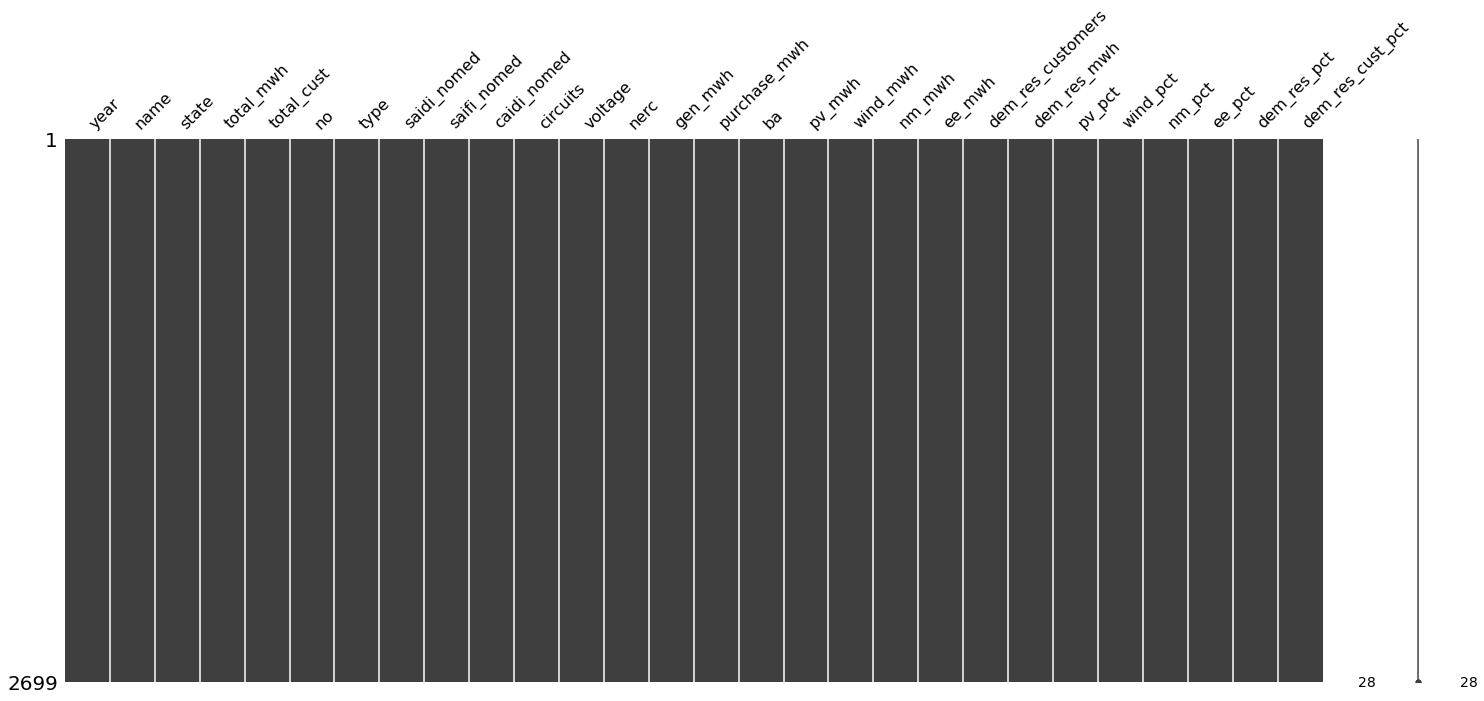

In [654]:
# make sure we're good to go
msno.matrix(df)

In [663]:
# export as CSV so I can use it in my next step
df.to_csv("df.csv",index=False)

## Unresolved pile

In [ ]:
# when we mergeed our dataframes, they dropped all the adjustments
# we decide to ignore these based on expert feedback
net_metering_18[net_metering_18['name'].str.contains("Adjustment")]

# Discard pile

I tried to make a function to automate all of this, but it is just taking too long

In [69]:
#net_metering = pd.DataFrame()
# for year in range(2015,2020):
#     df = pd.read_excel("Data/Net_Metering_{}.xlsx".format(year), header = [0,1,2])
#     df.columns = df.columns.map(' - '.join)
#     net_metering = net_metering.append(df)

In [87]:
#net_metering = net_metering.rename(columns={"Utility Characteristics - Unnamed: 0_level_1 - Data Year": "Year"})

In [94]:
#net_metering.Year.unique()

array([2015.,   nan])

In [ ]:
#rel_ut = reliability_18.merge(utility_18, on = ["name","state"])

In [ ]:
#rel_ut.merge(utility_18, on = ["name","state"])

In [ ]:
# was going to use to merge columns but not necessary
#cols = [col for col in net_metering_18.columns if 'Unnamed:' not in col]

In [ ]:
# Data management and investigation
import pandas as pd
import numpy as np
import missingno as msno
from plotnine import *
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

from functools import reduce

## Import data from each year

### 2019

# import 2019 reliability, net metering, energy efficiency, advanced metering infrastructure, demand response, and service territory data
reliability_19 = pd.read_excel("Data/Reliability_2019.xlsx", 
                               header = 1)
net_metering_19 = pd.read_excel("Data/Net_Metering_2019.xlsx", 
                                header = [0,1,2])
efficiency_19 = pd.read_excel("Data/Energy_Efficiency_2019.xlsx", 
                              header = [0,1,2])
demand_response_19 = pd.read_excel("Data/Demand_Response_2019.xlsx", 
                              header = [0,1,2])
territory_19 = pd.read_excel("Data/Service_Territory_2019.xlsx")
utility_19 = pd.read_excel("Data/Sales_Ult_Cust_2019.xlsx", 
                                header = [0,1,2])
circuits_19 = pd.read_excel("Data/Distribution_Systems_2019.xlsx")
op_19 = pd.read_excel("Data/Operational_Data_2019.xlsx", 
                                header = [0,1,2])

# Combine the headers together to describe each column
net_metering_19.columns = net_metering_19.columns.map(' - '.join)
efficiency_19.columns = efficiency_19.columns.map(' - '.join)
demand_response_19.columns = demand_response_19.columns.map(' - '.join)
utility_19.columns = utility_19.columns.map(' - '.join)
op_19.columns = op_19.columns.map(' - '.join)

# only grab the columns I want from each dataframe
reliability_19 = reliability_19[['Data Year',
                                 'Utility Number',
              'Utility Name', 
              'State', # control
              'Ownership', # control 
              'SAIDI Without MED',
              'SAIFI Without MED', 
              'CAIDI Without MED']].dropna()
reliability_19.columns = ['year','no', 'name', 'state','type','saidi_nomed', 'saifi_nomed', 'caidi_nomed']

op_19 = op_19[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
              'Utility Characteristics - Unnamed: 6_level_1 - NERC Region', 
              'Utility Characteristics - Unnamed: 4_level_1 - State',
              'Energy Sources (Megawatthours) - Unnamed: 9_level_1 - Net Generation',
              'Energy Sources (Megawatthours) - Unnamed: 10_level_1 - Wholesale Power Purchases' 
              ]].dropna()
op_19.columns = ['year','name','nerc','state','gen_mwh','purchase_mwh']

net_metering_19 = net_metering_19[['Utility Characteristics - Unnamed: 0_level_1 - Year',
                                   'Utility Characteristics - Unnamed: 3_level_1 - Utility Name',
                                   'Utility Characteristics - Unnamed: 1_level_1 - State',
                                   'Utility Characteristics - Unnamed: 5_level_1 - BA Code',
                'Photovoltaic - Energy Sold Back MWh - Total',
                'Wind - Energy Sold Back MWh - Total',
                'All Technologies - Energy Sold Back MWh - Total',
                ]].dropna()
net_metering_19.columns = ['year','name', 'state', 'ba','pv_mwh', 'wind_mwh', 'nm_mwh']

efficiency_19 = efficiency_19[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                               'Utility Characteristics - Unnamed: 4_level_1 - State',
                  'Reporting Year Incremental Annual Savings - Energy Savings (MWh) - Total']].dropna()
efficiency_19.columns = ['year','name','state','ee_mwh']

demand_response_19 = demand_response_19[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                                         'Utility Characteristics - Unnamed: 4_level_1 - State',
                    'Yearly Energy and Demand Savings - Number of Customers Enrolled - Total',
                    'Yearly Energy and Demand Savings - Energy Savings (MWh) - Total']].dropna()
demand_response_19.columns = ['year','name', 'state','dem_res_customers', 'dem_res_mwh']

territory_19 = territory_19[['Data Year',
                             'Utility Name',
             'State',
             'County']]
territory_19.columns = ['year','name', 'state', 'county']

utility_19 = utility_19[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                         'Utility Characteristics - Unnamed: 6_level_1 - State',
                         'TOTAL - Sales - Megawatthours',
                         'TOTAL - Customers - Count']].dropna()
utility_19.columns = ['year','name', 'state','total_mwh','total_cust']

circuits_19 = circuits_19[['Data Year',
                           'Utility Name',
                           'State',
                           'Distribution Circuits',
                         'Circuits with Voltage Optimization']]
circuits_19.columns = ['year','name', 'state','circuits', 'voltage']

## 2018

# import 2018 reliability, net metering, energy efficiency, advanced metering infrastructure, demand response, and service territory data
reliability_18 = pd.read_excel("Data/Reliability_2018.xlsx", 
                               header = 1)
net_metering_18 = pd.read_excel("Data/Net_Metering_2018.xlsx", 
                                header = [0,1,2])
efficiency_18 = pd.read_excel("Data/Energy_Efficiency_2018.xlsx", 
                              header = [0,1,2])
demand_response_18 = pd.read_excel("Data/Demand_Response_2018.xlsx", 
                              header = [0,1,2])
territory_18 = pd.read_excel("Data/Service_Territory_2018.xlsx")
utility_18 = pd.read_excel("Data/Sales_Ult_Cust_2018.xlsx", 
                                header = [0,1,2])
circuits_18 = pd.read_excel("Data/Distribution_Systems_2018.xlsx")
op_18 = pd.read_excel("Data/Operational_Data_2018.xlsx", 
                                header = [0,1,2])

# Combine the headers together to describe each column
net_metering_18.columns = net_metering_18.columns.map(' - '.join)
efficiency_18.columns = efficiency_18.columns.map(' - '.join)
demand_response_18.columns = demand_response_18.columns.map(' - '.join)
utility_18.columns = utility_18.columns.map(' - '.join)
op_18.columns = op_18.columns.map(' - '.join)

# only grab the columns I want from each dataframe
reliability_18 = reliability_18[['Data Year',
                                 'Utility Number',
              'Utility Name', 
              'State', # control
              'Ownership', # control 
              'SAIDI Without MED',
              'SAIFI Without MED', 
              'CAIDI Without MED']].dropna()
reliability_18.columns = ['year','no', 'name', 'state','type','saidi_nomed', 'saifi_nomed', 'caidi_nomed']

op_18 = op_18[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
              'Utility Characteristics - Unnamed: 5_level_1 - NERC Region', 
              'Utility Characteristics - Unnamed: 3_level_1 - State',
              'Energy Sources (Megawatthours) - Unnamed: 8_level_1 - Net Generation',
              'Energy Sources (Megawatthours) - Unnamed: 9_level_1 - Wholesale Power Purchases' 
              ]].dropna()
op_18.columns = ['year','name','nerc','state','gen_mwh','purchase_mwh']

net_metering_18 = net_metering_18[['Utility Characteristics - Unnamed: 0_level_1 - Year',
                                   'Utility Characteristics - Unnamed: 3_level_1 - Utility Name',
                                   'Utility Characteristics - Unnamed: 1_level_1 - State',
                                   'Utility Characteristics - Unnamed: 4_level_1 - BA Code',
                'Photovoltaic - Energy Sold Back MWh - Total',
                'Wind - Energy Sold Back MWh - Total',
                'All Technologies - Energy Sold Back MWh - Total',
                ]].dropna()
net_metering_18.columns = ['year','name', 'state', 'ba','pv_mwh', 'wind_mwh', 'nm_mwh']

efficiency_18 = efficiency_18[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                               'Utility Characteristics - Unnamed: 3_level_1 - State',
                  'Reporting Year Incremental Annual Savings - Energy Savings (MWh) - Total']].dropna()
efficiency_18.columns = ['year','name','state','ee_mwh']

demand_response_18 = demand_response_18[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                                         'Utility Characteristics - Unnamed: 3_level_1 - State',
                    'Yearly Energy and Demand Savings - Number of Customers Enrolled - Total',
                    'Yearly Energy and Demand Savings - Energy Savings (MWh) - Total']].dropna()
demand_response_18.columns = ['year','name', 'state','dem_res_customers', 'dem_res_mwh']

territory_18 = territory_18[['Data Year',
                             'Utility Name',
             'State',
             'County']]
territory_18.columns = ['year','name', 'state', 'county']

utility_18 = utility_18[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                         'Utility Characteristics - Unnamed: 6_level_1 - State',
                         'TOTAL - Sales - Megawatthours',
                         'TOTAL - Customers - Count']].dropna()
utility_18.columns = ['year','name', 'state','total_mwh','total_cust']

circuits_18 = circuits_18[['Data Year',
                           'Utility Name',
                           'State',
                           'Distribution Circuits',
                         'Circuits with Voltage Optimization']]
circuits_18.columns = ['year','name', 'state','circuits', 'voltage']

## 2017

# import 2017 reliability, net metering, energy efficiency, advanced metering infrastructure, demand response, and service territory data
reliability_17 = pd.read_excel("Data/Reliability_2017.xlsx", 
                               header = 1)
net_metering_17 = pd.read_excel("Data/Net_Metering_2017.xlsx", 
                                header = [0,1,2])
efficiency_17 = pd.read_excel("Data/Energy_Efficiency_2017.xlsx", 
                              header = [0,1,2])
demand_response_17 = pd.read_excel("Data/Demand_Response_2017.xlsx", 
                              header = [0,1,2])
territory_17 = pd.read_excel("Data/Service_Territory_2017.xlsx")
utility_17 = pd.read_excel("Data/Sales_Ult_Cust_2017.xlsx", 
                                header = [0,1,2])
circuits_17 = pd.read_excel("Data/Distribution_Systems_2017.xlsx")
op_17 = pd.read_excel("Data/Operational_Data_2017.xlsx", 
                                header = [0,1,2])

# Combine the headers together to describe each column
net_metering_17.columns = net_metering_17.columns.map(' - '.join)
efficiency_17.columns = efficiency_17.columns.map(' - '.join)
demand_response_17.columns = demand_response_17.columns.map(' - '.join)
utility_17.columns = utility_17.columns.map(' - '.join)
op_17.columns = op_17.columns.map(' - '.join)

# only grab the columns I want from each dataframe
reliability_17 = reliability_17[['Data Year',
                                 'Utility Number',
              'Utility Name', 
              'State', # control
              'Ownership', # control 
              'SAIDI Without MED',
              'SAIFI Without MED', 
              'CAIDI Without MED']].dropna()
reliability_17.columns = ['year','no', 'name', 'state','type','saidi_nomed', 'saifi_nomed', 'caidi_nomed']

op_17 = op_17[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
              'Utility Characteristics - Unnamed: 5_level_1 - NERC Region', 
              'Utility Characteristics - Unnamed: 3_level_1 - State',
              'Energy Sources (Megawatthours) - Unnamed: 8_level_1 - Net Generation',
              'Energy Sources (Megawatthours) - Unnamed: 9_level_1 - Wholesale Power Purchases' 
              ]].dropna()
op_17.columns = ['year','name','nerc','state','gen_mwh','purchase_mwh']

net_metering_17 = net_metering_17[['Utility Characteristics - Unnamed: 0_level_1 - Year',
                                   'Utility Characteristics - Unnamed: 3_level_1 - Utility Name',
                                   'Utility Characteristics - Unnamed: 1_level_1 - State',
                                   'Utility Characteristics - Unnamed: 4_level_1 - BA Code',
                'Photovoltaic - Energy Sold Back MWh - Total',
                'Wind - Energy Sold Back MWh - Total',
                'All Technologies - Energy Sold Back MWh - Total',
                ]].dropna()
net_metering_17.columns = ['year','name', 'state', 'ba','pv_mwh', 'wind_mwh', 'nm_mwh']

efficiency_17 = efficiency_17[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                               'Utility Characteristics - Unnamed: 3_level_1 - State',
                  'Reporting Year Incremental Annual Savings - Energy Savings (MWh) - Total']].dropna()
efficiency_17.columns = ['year','name','state','ee_mwh']

demand_response_17 = demand_response_17[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                                         'Utility Characteristics - Unnamed: 3_level_1 - State',
                    'Yearly Energy and Demand Savings - Number of Customers Enrolled - Total',
                    'Yearly Energy and Demand Savings - Energy Savings (MWh) - Total']].dropna()
demand_response_17.columns = ['year','name', 'state','dem_res_customers', 'dem_res_mwh']

territory_17 = territory_17[['Data Year',
                             'Utility Name',
             'State',
             'County']]
territory_17.columns = ['year','name', 'state', 'county']

utility_17 = utility_17[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                         'Utility Characteristics - Unnamed: 6_level_1 - State',
                         'TOTAL - Sales - Megawatthours',
                         'TOTAL - Customers - Count']].dropna()
utility_17.columns = ['year','name', 'state','total_mwh','total_cust']

circuits_17 = circuits_17[['Data Year',
                           'Utility Name',
                           'State',
                           'Distribution Circuits',
                         'Circuits with Voltage Optimization']]
circuits_17.columns = ['year','name', 'state','circuits', 'voltage']

## 2016

# import 2016 reliability, net metering, energy efficiency, advanced metering infrastructure, demand response, and service territory data
reliability_16 = pd.read_excel("Data/Reliability_2016.xlsx", 
                               header = 1)
net_metering_16 = pd.read_excel("Data/Net_Metering_2016.xlsx", 
                                header = [0,1,2,3])
efficiency_16 = pd.read_excel("Data/Energy_Efficiency_2016.xlsx", 
                              header = [0,1,2])
demand_response_16 = pd.read_excel("Data/Demand_Response_2016.xlsx", 
                              header = [0,1,2])
territory_16 = pd.read_excel("Data/Service_Territory_2016.xlsx")
utility_16 = pd.read_excel("Data/Sales_Ult_Cust_2016.xlsx", 
                                header = [0,1,2])
circuits_16 = pd.read_excel("Data/Distribution_Systems_2016.xlsx")
op_16 = pd.read_excel("Data/Operational_Data_2016.xlsx", 
                                header = [0,1,2])

# Combine the headers together to describe each column
net_metering_16.columns = net_metering_16.columns.map(' - '.join)
efficiency_16.columns = efficiency_16.columns.map(' - '.join)
demand_response_16.columns = demand_response_16.columns.map(' - '.join)
utility_16.columns = utility_16.columns.map(' - '.join)
op_16.columns = op_16.columns.map(' - '.join)

# only grab the columns I want from each dataframe
reliability_16 = reliability_16[['Data Year',
                                 'Utility Number',
              'Utility Name', 
              'State', # control
              'Ownership', # control 
              'SAIDI Without MED',
              'SAIFI Without MED', 
              'CAIDI Without MED']].dropna()
reliability_16.columns = ['year','no', 'name', 'state','type','saidi_nomed', 'saifi_nomed', 'caidi_nomed']

op_16 = op_16[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
              'Utility Characteristics - Unnamed: 5_level_1 - NERC Region', 
              'Utility Characteristics - Unnamed: 3_level_1 - State',
              'Energy Sources (Megawatthours) - Unnamed: 8_level_1 - Net Generation',
              'Energy Sources (Megawatthours) - Unnamed: 9_level_1 - Wholesale Power Purchases' 
              ]].dropna()
op_16.columns = ['year','name','nerc','state','gen_mwh','purchase_mwh']

net_metering_16 = net_metering_16[['Utility Level Data - States - Utility Characteristics - Unnamed: 0_level_2 - Year',
                                   'Utility Level Data - States - Utility Characteristics - Unnamed: 3_level_2 - Utility Name',
                                   'Utility Level Data - States - Utility Characteristics - Unnamed: 1_level_2 - State',
               'Utility Level Data - States - Photovoltaic - Energy Sold Back MWh - Total',
                'Utility Level Data - States - Wind - Energy Sold Back MWh - Total',
                'Utility Level Data - States - All Technologies - Energy Sold Back MWh - Total',
                ]].dropna()
net_metering_16.columns = ['year','name', 'state','pv_mwh', 'wind_mwh', 'nm_mwh']

efficiency_16 = efficiency_16[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                               'Utility Characteristics - Unnamed: 3_level_1 - State',
                  'Reporting Year Incremental Annual Savings - Energy Savings (MWh) - Total']].dropna()
efficiency_16.columns = ['year','name','state','ee_mwh']

demand_response_16 = demand_response_16[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                                         'Utility Characteristics - Unnamed: 3_level_1 - State',
                    'Yearly Energy and Demand Savings - Number of Customers Enrolled - Total',
                    'Yearly Energy and Demand Savings - Energy Savings (MWh) - Total']].dropna()
demand_response_16.columns = ['year','name', 'state','dem_res_customers', 'dem_res_mwh']

territory_16 = territory_16[['Data Year',
                             'Utility Name',
             'State',
             'County']]
territory_16.columns = ['year','name', 'state', 'county']

utility_16 = utility_16[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                         'Utility Characteristics - Unnamed: 6_level_1 - State',
                         'TOTAL - Sales - Megawatthours',
                         'TOTAL - Customers - Count']].dropna()
utility_16.columns = ['year','name', 'state','total_mwh','total_cust']

circuits_16 = circuits_16[['Data Year',
                           'Utility Name',
                           'State',
                           'Distribution Circuits',
                         'Circuits with Voltage Optimization']]
circuits_16.columns = ['year','name', 'state','circuits', 'voltage']

## 2015

# import 2015 reliability, net metering, energy efficiency, advanced metering infrastructure, demand response, and service territory data
reliability_15 = pd.read_excel("Data/Reliability_2015.xlsx", 
                               header = 1)
net_metering_15 = pd.read_excel("Data/Net_Metering_2015.xlsx", 
                                header = [0,1,2])
efficiency_15 = pd.read_excel("Data/Energy_Efficiency_2015.xlsx", 
                              header = [0,1,2])
demand_response_15 = pd.read_excel("Data/Demand_Response_2015.xlsx", 
                              header = [0,1,2])
territory_15 = pd.read_excel("Data/Service_Territory_2015.xlsx")
utility_15 = pd.read_excel("Data/Sales_Ult_Cust_2015.xlsx", 
                                header = [0,1,2])
circuits_15 = pd.read_excel("Data/Distribution_Systems_2015.xlsx")
op_15 = pd.read_excel("Data/Operational_Data_2015.xlsx", 
                                header = [0,1,2])

# Combine the headers together to describe each column
net_metering_15.columns = net_metering_15.columns.map(' - '.join)
efficiency_15.columns = efficiency_15.columns.map(' - '.join)
demand_response_15.columns = demand_response_15.columns.map(' - '.join)
utility_15.columns = utility_15.columns.map(' - '.join)
op_15.columns = op_15.columns.map(' - '.join)

# only grab the columns I want from each dataframe
reliability_15 = reliability_15[['Data Year',
                                 'Utility Number',
              'Utility Name', 
              'State', # control
              'Ownership', # control 
              'SAIDI Without MED',
              'SAIFI Without MED', 
              'CAIDI Without MED']].dropna()
reliability_15.columns = ['year','no', 'name', 'state','type','saidi_nomed', 'saifi_nomed', 'caidi_nomed']

op_15 = op_15[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
              'Utility Characteristics - Unnamed: 5_level_1 - NERC Region', 
              'Utility Characteristics - Unnamed: 3_level_1 - State',
              'Energy Sources (Megawatthours) - Unnamed: 8_level_1 - Net Generation',
              'Energy Sources (Megawatthours) - Unnamed: 9_level_1 - Wholesale Power Purchases' 
              ]].dropna()
op_15.columns = ['year','name','nerc','state','gen_mwh','purchase_mwh']

net_metering_15 = net_metering_15[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                                   'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                                   'Utility Characteristics - Unnamed: 3_level_1 - State',
                                   'Photovoltaic - Energy Sold Back MWh - Total',
                'Wind - Energy Sold Back MWh - Total',
                'Total - Energy Sold Back MWh - Total',
                ]].dropna()
net_metering_15.columns = ['year','name', 'state','pv_mwh', 'wind_mwh', 'nm_mwh']

efficiency_15 = efficiency_15[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                               'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                               'Utility Characteristics - Unnamed: 3_level_1 - State',
                  'Reporting Year Incremental Annual Savings - Energy Savings (MWh) - Total']].dropna()
efficiency_15.columns = ['year','name','state','ee_mwh']

demand_response_15 = demand_response_15[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                                         'Utility Characteristics - Unnamed: 3_level_1 - State',
                    'Yearly Energy and Demand Savings - Number of Customers Enrolled - Total',
                    'Yearly Energy and Demand Savings - Energy Savings (MWh) - Total']].dropna()
demand_response_15.columns = ['year','name', 'state','dem_res_customers', 'dem_res_mwh']

territory_15 = territory_15[['Data Year',
                             'Utility Name',
             'State',
             'County']]
territory_15.columns = ['year','name', 'state', 'county']

utility_15 = utility_15[['Utility Characteristics - Unnamed: 0_level_1 - Data Year',
                         'Utility Characteristics - Unnamed: 2_level_1 - Utility Name',
                         'Utility Characteristics - Unnamed: 6_level_1 - State',
                         'TOTAL - Sales - Megawatthours',
                         'TOTAL - Customers - Count']].dropna()
utility_15.columns = ['year','name', 'state','total_mwh','total_cust']

circuits_15 = circuits_15[['Data Year',
                           'Utility Name',
                           'State',
                           'Distribution Circuits',
                         'Circuits with Voltage Optimization']]
circuits_15.columns = ['year','name', 'state','circuits', 'voltage']

# Merge all datasets

![image.png](attachment:image.png)

# all of our datasets into onee list
df_list = [circuits_15, circuits_16, circuits_17, circuits_18, circuits_19, demand_response_15, demand_response_16, demand_response_17, demand_response_18, 
demand_response_19, df, efficiency_15, efficiency_16, efficiency_17, efficiency_18, efficiency_19, filename, net_metering, 
net_metering_15, net_metering_16, net_metering_17, net_metering_18, net_metering_19, op_15, op_16, op_17, op_18, 
op_19, reliability_15, reliability_16, reliability_17, reliability_18, reliability_19, territory_15, territory_16, territory_17, 
territory_18, territory_19, utility_15, utility_16, utility_17, utility_18, utility_19]

# merge all the lists together by utility name 
df_list_19 = [utility_19, reliability_19, circuits_19, op_19, net_metering_19, efficiency_19, demand_response_19]
df_19 = reduce(lambda left,right: pd.merge(left,right,on=['name','state','year'], how='outer'), df_list_19)

df_list_18 = [utility_18, reliability_18, circuits_18, op_18, net_metering_18, efficiency_18, demand_response_18]
df_18 = reduce(lambda left,right: pd.merge(left,right,on=['name','state','year'], how='outer'), df_list_18)

df_list_17 = [utility_17, reliability_17, circuits_17, op_17, net_metering_17, efficiency_17, demand_response_17]
df_17 = reduce(lambda left,right: pd.merge(left,right,on=['name','state','year'], how='outer'), df_list_17)

df_list_16 = [utility_16, reliability_16, circuits_16, op_16, net_metering_16, efficiency_16, demand_response_16]
df_16 = reduce(lambda left,right: pd.merge(left,right,on=['name','state','year'], how='outer'), df_list_16)

df_list_15 = [utility_15, reliability_15, circuits_15, op_15, net_metering_15, efficiency_15, demand_response_15]
df_15 = reduce(lambda left,right: pd.merge(left,right,on=['name','state','year'], how='outer'), df_list_15)

df = df_19.append([df_18,df_17,df_16,df_15])

# drop the duplicate rows 
df = df[~df.duplicated(['name', 'state','year'])]

# drop all the entries where my outcome variable is not present (SAIDI, SAIFI and CAIDI are same – I checked)
df = df[~df.saidi_nomed.isna()]

# remove those missing total customer data and total megawatthours or nerc region
df = df[~df.total_mwh.isna()]
df = df[~df.total_cust.isna()]
df = df[~df.nerc.isna()]

df.isna().sum()

# fill na's with 0 
# i assume that if they didn't fill it out, there is nothing to report
# i filled ba code even though that's incorrect because i ended up not using it
df = df.fillna(0).reset_index(drop=True)

### Final check for accuracy

df.sample(6)

Here, I did a check on a random sample of 6 observations across categories to make sure everything looked good. When there's a NA for any of the reliability metrics, that means that data was missing from the survey, and I cannot simply impute with 0's – that would incorrectly be assuming that they had no system interruptions. My best option is to simply drop these rows, since they lack my outcome variable.

### Make the percentage net metering, energy efficiency, and demand response columns. 

df['pv_pct'] = ((df['pv_mwh']/df['total_mwh']) * 100).fillna(0)

df['wind_pct'] = ((df['wind_mwh']/df['total_mwh']) * 100).fillna(0)

df['nm_pct'] = ((df['nm_mwh']/df['total_mwh']) * 100).fillna(0)

# change periods to 0 
df.loc[df["ee_mwh"] == ".", 'ee_mwh'] = 0

df.loc[df["dem_res_customers"] == ".", 'dem_res_customers'] = 0

df.loc[df["dem_res_mwh"] == ".", 'dem_res_mwh'] = 0

df.loc[df["purchase_mwh"] == ".", 'purchase_mwh'] = 0

df.loc[df["dem_res_customers"] == ".", 'dem_res_customers'] = 0

df = df[(df.voltage != '.')]

df = df[(df.circuits != '.')]

df.query("voltage == ''")

df['dem_res_customers'] = pd.to_numeric(df['dem_res_customers'], errors='coerce')

df['dem_res_mwh'] = pd.to_numeric(df['dem_res_mwh'], errors='coerce')

df['purchase_mwh'] = pd.to_numeric(df['purchase_mwh'], errors='coerce')

df['gen_mwh'] = pd.to_numeric(df['gen_mwh'], errors='coerce')

df['voltage'] = pd.to_numeric(df['voltage'], errors='coerce')

df['circuits'] = pd.to_numeric(df['circuits'], errors='coerce')

# coercion produced new missing values in the 2 demand response columns so i fill them in
df = df.fillna(0).reset_index(drop=True)

df['ee_pct'] = ((df['ee_mwh']/df['total_mwh']) * 100).fillna(0)

df['dem_res_pct'] = ((df['dem_res_mwh']/df['total_mwh']) * 100).fillna(0)

df['dem_res_cust_pct'] = ((df['dem_res_customers']/df['total_cust']) * 100).fillna(0)

### Need to justify using SAIDI rather than SAIFI or CAIDI

Using 2015-2019 data: There are still more entries for SAIDI than either of the other 2 metrics.

When I was just using 2019 data: There are 766 entries for SAIDI, and only about 705 for SAIFI and CAIDI. Therefore, I will be using SAIDI as my index for grid reliability.

# check non zero entries
# df_18[(df_18.saifi_nomed != '.')]

# limit dataframe to SAIDI, which has the most nonzero entries 
df = df[(df.saidi_nomed != '.')].reset_index(drop=True)

df.describe()

#df_18 = df_18.drop(['pv_mwh',
#            'wind_mwh',
#            'nm_mwh',
#            'ee_mwh',
#            'dem_res_customers',
#            'dem_res_mwh'], axis = 1)

df.sort_values(by='name')

# make sure we're good to go
msno.matrix(df)

# export as CSV so I can use it in my next step
df.to_csv("df.csv",index=False)

## Unresolved pile

# when we mergeed our dataframes, they dropped all the adjustments
# we decide to ignore these based on expert feedback
net_metering_18[net_metering_18['name'].str.contains("Adjustment")]

# Discard pile

I tried to make a function to automate all of this, but it is just taking too long

#net_metering = pd.DataFrame()
# for year in range(2015,2020):
#     df = pd.read_excel("Data/Net_Metering_{}.xlsx".format(year), header = [0,1,2])
#     df.columns = df.columns.map(' - '.join)
#     net_metering = net_metering.append(df)

#net_metering = net_metering.rename(columns={"Utility Characteristics - Unnamed: 0_level_1 - Data Year": "Year"})

#net_metering.Year.unique()

#rel_ut = reliability_18.merge(utility_18, on = ["name","state"])

#rel_ut.merge(utility_18, on = ["name","state"])

# was going to use to merge columns but not necessary
#cols = [col for col in net_metering_18.columns if 'Unnamed:' not in col]